# Introduction to Statistics in Python

[WWW Schools: Random Numbers and Distributions in Numpy](https://www.w3schools.com/python/numpy/numpy_random.asp)

## Summary Statistics

**Mean and median**
In this chapter, you'll be working with the food_consumption dataset from 2018 Food Carbon Footprint Index by nu3. The food_consumption dataset contains the number of kilograms of food consumed per person per year in each country and food category (consumption), and its carbon footprint (co2_emissions) measured in kilograms of carbon dioxide, or CO2.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills.

In [2]:
# Import numpy with alias np
import numpy as np
import pandas as pd

# Importing the course datasets
food_consumption = pd.read_csv("food_consumption.csv")

# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption.country == 'USA']

# Calculate mean consumption in USA
print('Consumption in USA:',
        usa_consumption.consumption.mean())

# Calculate median consumption in USA
print('Consumption in USA:',
        usa_consumption.consumption.median())

Consumption in USA: 44.650000000000006
Consumption in USA: 14.58


**Mean vs. median**
In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

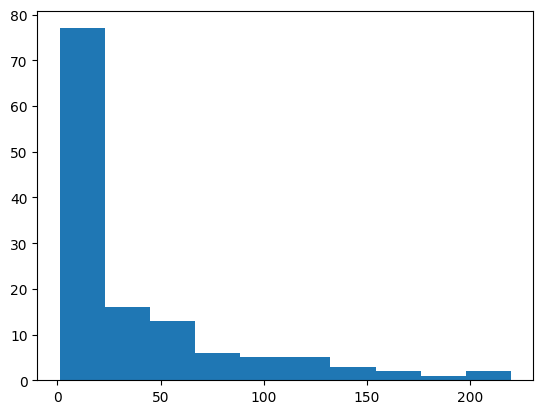

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [3]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption.food_category == 'rice']

# Histogram of co2_emission for rice and show plot
#rice_consumption.hist(
#    rice_consumption.co2_emission)
plt.hist(rice_consumption.co2_emission)
plt.show()

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.co2_emission.agg(['mean','median']))

## Random Numbers and Probability

In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.

**Calculating probabilities**
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by:
$$
  P_{event} = \frac{Ways\,event\,can\,happen}{Total\,possible\,outcomes}
$$

In [4]:
import numpy as np
import pandas as pd

# Importing the course datasets
amir_deals = pd.read_csv("amir_deals.csv")

amir_deals.sample(8)

,Unnamed: 0,product,client,status,amount,num_users
76,77,Product B,Current,Won,3950.94,39
0,1,Product F,Current,Won,7389.52,19
18,19,Product A,Current,Won,9913.27,34
24,25,Product B,New,Lost,3124.62,31
141,142,Product B,Current,Won,4795.64,8
89,90,Product B,Current,Won,3231.52,65
138,139,Product C,Current,Won,-539.23,11
88,89,Product B,Current,Won,5276.01,82


In [7]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

print(counts,'\n')
# Calculate probability of picking a deal with each product
probs = 100 * amir_deals['product'].value_counts() / amir_deals['product'].value_counts().values.sum()
print(probs)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64 

product
Product B    34.831461
Product D    22.471910
Product A    12.921348
Product C     8.426966
Product F     6.179775
Product H     4.494382
Product I     3.932584
Product E     2.808989
Product N     1.685393
Product G     1.123596
Product J     1.123596
Name: count, dtype: float64


**Sampling deals**
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5,replace=True)
print(sample_with_replacement)

### Discrete Distribution

**Creating a probability distribution**
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "group_id" : ["A","B","C","D","E","F","G","H","I","J"],
    "group_size" : [2,4,6,2,2,2,3,2,4,2]
}
restaurant_groups = pd.DataFrame(data)

'restaurant_groups\n  group_id  group_size\n0        A           2\n1        B           4\n2        C           6\n3        D           2\n4        E           2\n5        F           2\n6        G           3\n7        H           2\n8        I           4\n9        J           2\n'

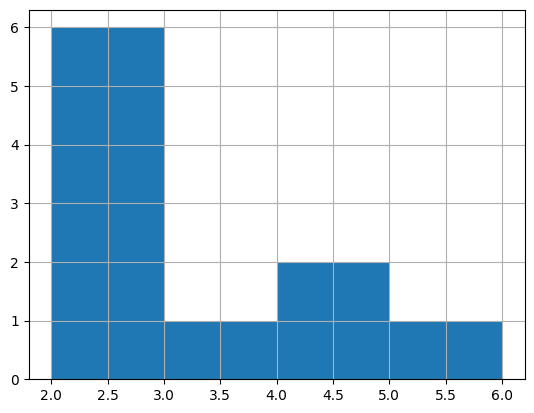

In [5]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [6]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist.prob[size_dist.prob >= 4]
print(groups_4_or_more)

# Sum the probabilities of groups_4_or_more
prob_4_or_more = 0.30000000000000004 #np.sum(groups_4_or_more)
print(prob_4_or_more)

Series([], Name: prob, dtype: float64)
0.30000000000000004


### Continuous Distribution

**Data back-ups**

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [9]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print('Probability')
print('p < 5:      ',prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30)
print('p > 5:      ',prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30) - uniform.cdf(10,0,30)
print('10 < p < 20:',prob_between_10_and_20)

Probability
p < 5:       0.16666666666666666
p > 5:       0.8333333333333334
10 < p < 20: 0.3333333333333333


**Simulating wait times**

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

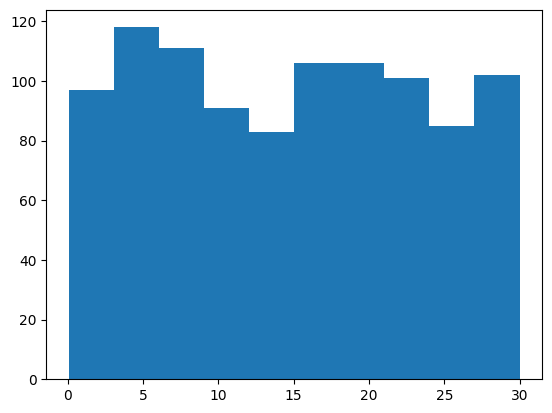

In [11]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0,30,1000)

#print(wait_times)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### The Binomial Distribution

**Simulating sales deals**
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.
numpy is imported as np.

In [3]:
import numpy as np

# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3 , 0.3, size=52)

print(deals)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
[1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0 2 0
 1 1 2 0 2 1 1 0 2 0 0 1 0 2 0]
0.8461538461538461


**Calculating binomial probabilities**
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

In [2]:
import numpy as np
import pandas as pd
# Import binom from scipy.stats
from scipy.stats import binom

# Probability of closing 3 out of 3 deals
# pmf(# of successes, # of trials, probability of success)
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
# cdf: accumulated probabilty
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)

print(prob_greater_than_1)

0.027
0.784
0.21599999999999997


**How many sales will be won?**

Now Amir wants to know how many deals he can expect to close each week if his win 
rate changes. Luckily, you can use your binomial distribution knowledge to help 
him calculate the expected value in different situations. Recall from the video 
that the expected value of a binomial distribution can be calculated by: 

$$
  P\,_{Probability\,of\,success} = n\,_{Number\,of\,trials}\,X\,p\,_{The\,probability\,of\,single\,success}
$$

- Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [1]:
import numpy as np
import pandas as pd
# Import binom from scipy.stats
from scipy.stats import binom

# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


## More Distributions and the Central Limit Theorem

It’s time to explore one of the most important probability distributions in statistics, normal distribution. You’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding your knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to your repertoire.

### The Normal Distribution

The next probability distribution we'll discuss is the normal distribution. It's one of the most important probability distributions you'll learn about since a countless number of statistical methods rely on it, and it applies to more real-world situations than the distributions we've covered so far.

**What is the normal distribution?**

Its shape is commonly referred to as a *"bell curve"*. The normal distribution has a few important properties.
1. Symmetrical: First, it's symmetrical, so the left side is a mirror image of the right.
2. Area = 1. Second, just like any continuous distribution, the area beneath the curve is 1.
3. Curve never hits 0: Second, the probability never hits 0, even if it looks like it does at the tail ends. Only 0-point-006% of its area is contained beyond the edges of this graph.
4. Described by mean and standard deviation: The normal distribution is described by its mean and standard deviation. Here is a normal distribution with a mean of 20 and standard deviation of 3, and here is a normal distribution with a mean of 0 and a standard deviation of 1. When a normal distribution has mean 0 and a standard deviation of 1, it's a special distribution called the **standard normal distribution**. Notice how both distributions have the same shape, but their axes have different scales.
5. Areas under the normal distribution: For the normal distribution,
   - 68% of the area is within 1 standard deviation of the mean.
   - 95% of the area falls within 2 standard deviations of the mean, and
   - 99.7% of the area falls within three standard deviations. This is sometimes called the 68-95-99-point-7 rule.
6. Lots of histograms look normal: There's lots of real-world data shaped like the normal distribution. For example, a histogram of the heights of women that participated in the National Health and Nutrition Examination Survey. The mean height is around 161 centimeters and the standard deviation is about 7 centimeters. Since this height data closely resembles the normal distribution, we can take the area under a normal distribution with mean 161 and standard deviation 7 to approximate what percent of women fall into different height ranges.

    - What percent of women are shorter than 154 cm? For example, what percent of women are shorter than 154 centimeters? We can answer this using `norm-dot-cdf from scipy-dot-stats`, which takes the area of the normal distribution less than some number. We pass in the number of interest, 154, followed by the mean and standard deviation of the normal distribution we're using, `norm.cdf((154, 161, 7) = 0.1586`. This gives us about 16% of women are shorter than 154 centimeters.
    - What percent of women are taller than 154 cm? To find the percent of women taller than 154 centimeters, we can take 1 minus the area on the left of 154, which equals the area to the right of 154, `1 - norm.cdf((154, 161, 7) = 0.8414`.
    - What percent of women are 154-157 cm? To get the percent of women between 154 and 157 centimeters tall we can take the area below 157 and subtract the area below 154, which leaves us the area between 154 and 157, `norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7) = 0.1252`.
    - What height are 90% of women shorter than? We can also calculate percentages from heights using `norm-dot-ppf`. To figure out what height 90% of women are shorter than, we pass 0.9 into `norm-dot-ppf` along with the same mean and standard deviation we've been working with, `norm.ppf((0.9), 161, 7) = 169.97`. This tells us that 90% of women are shorter than 170 centimeters tall.
    - What height are 90% of women taller than? We can figure out the height 90% of women are taller than, since this is also the height that 10% of women are shorter than. We can take 1 minus 0.9 to get 0.1, which we'll use as the first argument of `norm.ppf((1-0.9), 161, 7) = 152.029`.
7. Generating random numbers: Just like with other distributions, we can generate random numbers from a normal distribution using `norm-dot-rvs`, passing in the distribution's mean and standard deviation, as well as the sample size we want.


**Distribution of Amir's sales**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

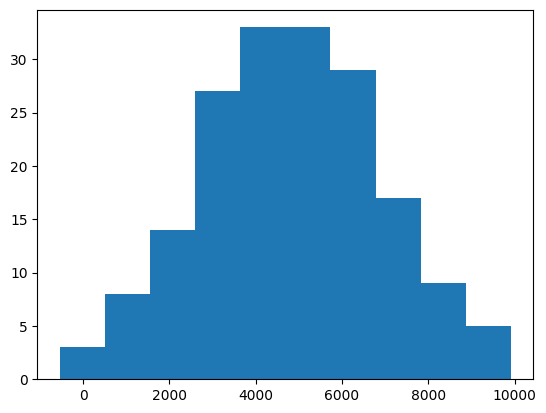

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the course datasets
amir_deals = pd.read_csv("amir_deals.csv")

# Histogram of amount with 10 bins and show plot
plt.hist(amir_deals.amount, bins=10)
# amir_deals.amount.hist(bins=10)
plt.show()

**Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

In [2]:
from scipy.stats import norm

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000,5000,2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

# What amount will 25% of Amir's sales be less than?
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


**Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

- Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in `new_mean`.

- Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in `new_sd`.

- Create a variable called `new_sales`, which contains 36 simulated amounts from a normal distribution with a mean of `new_mean` and a standard deviation of `new_sd`.

- Plot the distribution of the `new_sales` amounts using a histogram and show the plot.

New Simulated Sales:
[ 7587.07355539  3843.87967968  3093.78576833  2624.70415358
  4821.99771486 11065.42053116  5271.6773713   5249.99766969
  6885.80612417 10049.1053132   5342.63903533  2912.28869829
  3068.47187158  5431.29659383  3732.37516828  5407.32003483
 10913.65428106  4059.97620423  8940.5461833   7636.54148151
  1109.57666935  4700.60686282  6605.60989838  3733.61044516
  5830.97946345  5530.13505857  8266.36632129  6730.12420584
  4437.25783817  7343.20713184  5800.58185841  8429.51894853
 10669.18146456  3189.10244719  8928.91453988 -1615.70018319]


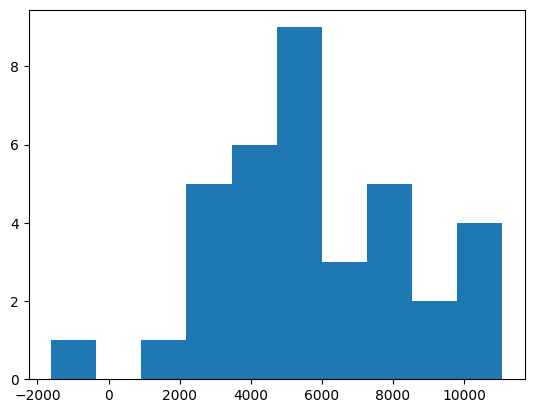

In [19]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size=36)

print('New Simulated Sales:')
print(new_sales)

# Create histogram and show
plt.hist(new_sales)
plt.show()

**Which market is better?**

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of 5000 and a standard deviation of 2000, and Amir's predicted amounts in next quarter's market have a mean of 6000 and a standard deviation of 2600.

Based **only** on the metric of **percent of sales over $1000**, does Amir perform better in the current market or the predicted market?

In [21]:
print('Current Market Performance:')
print(100 * (1 - norm.cdf(1000,5000,2000)),'\n')

print('Next Quarter Market Performance:')
print(100 * (1 - norm.cdf(1000,6000,2600)))

Current Market Performance:
97.72498680518208 

Next Quarter Market Performance:
97.27648049862613


### The Central Limit Theorem

**Rolling the dice 5 times:** 

Let's go back to our dice rolling example. This gives us the results of 5 rolls. Now, we'll take the mean of the 5 rolls, which gives us 2. If we roll another 5 times and take the mean, we get a different mean. If we do it again, we get another mean. Let's repeat this 10 times: we'll roll 5 times and take the mean. To do this, we'll use a for loop. We start by creating an empty list called `sample_means` to hold our means. We loop from 0 to 9 so that the process is repeated 10 times. Inside the loop, we roll 5 times and append the sample's mean to the `sample_means` list. This gives us a list of 10 different sample means. Let's plot these sample means.

**Sampling distributions:**

A distribution of a summary statistic like this is called a sampling distribution. This distribution, specifically, is a sampling distribution of the sample mean. Now let's do this 100 times. If we look at the new sampling distribution, its shape somewhat resembles the *normal distribution*, even though the distribution of the die is *uniform*. Let's take 1000 means. This sampling distribution more closely resembles the *normal distribution*.

**Central limit theorem**

This phenomenon is known as the central limit theorem, which states that a sampling distribution will approach a normal distribution as the number of trials increases. In our example, the sampling distribution became closer to the normal distribution as we took more and more sample means. It's important to note that the central limit theorem only applies when samples are taken randomly and are independent, for example, randomly picking sales deals with replacement.

**Standard deviation and the CLT**

The *central limit theorem*, or CLT, applies to other summary statistics as well. If we take the standard deviation of 5 rolls 1000 times, the sample standard deviations are distributed normally, centered around 1.9, which is the distribution's standard deviation.

**Proportions and the CLT**

Another statistic that the CLT applies to is proportion. Let's sample from the sales team 10 times with replacement and see how many draws have Claire as the outcome. In this case, 10% of draws were Claire. If we draw again, there are 40% Claires.

If we repeat this 1000 times and plot the distribution of the sample proportions, it resembles a normal distribution centered around 0-point-25, since Claire's name was on 25% of the tickets.

**Mean of sampling distribution**

Since these sampling distributions are normal, we can take their mean to get an estimate of a distribution's *mean*, *standard deviation*, or *proportion*. If we take the *mean* of our sample *means* from earlier, we get 3.48. That's pretty close to the expected value, which is 3.5! Similarly, the *mean* of the sample proportions of Claires isn't far off from 0.25. In these examples, we know what the underlying distributions look like, but if we don't, this can be a useful method for estimating characteristics of an underlying distribution. 

The *central limit theorem* also comes in handy when you have a huge population and don't have the time or resources to collect data on everyone. Instead, you can collect several smaller samples and create a sampling distribution to estimate what the *mean* or *standard deviation* is.

**The CLT in action**

The central limit theorem states that a sampling distribution of a sample statistic 
approaches the normal distribution as you take more samples, no matter the original 
distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem 
in action while examining the num_users column of amir_deals more closely, which 
contains the number of people who intend to use the product Amir is selling.

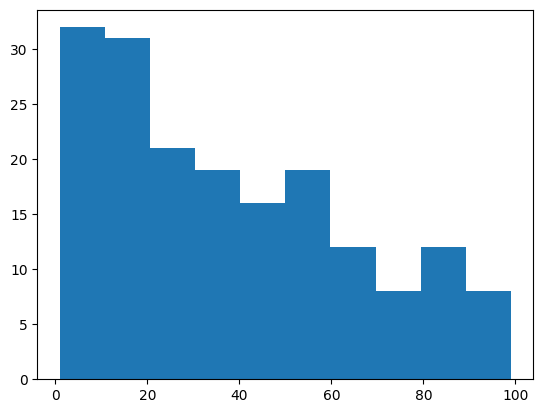

In [3]:
# Histogram of amount with 10 bins and show plot
plt.hist(amir_deals.num_users, bins=10)
# amir_deals.amount.hist(bins=10)
plt.show()

Samples Mean:
[np.float64(31.35), np.float64(45.05), np.float64(33.55), np.float64(38.15), np.float64(50.85), np.float64(31.85), np.float64(34.65), np.float64(36.25), np.float64(38.9), np.float64(44.05), np.float64(35.45), np.float64(37.6), np.float64(37.95), np.float64(28.85), np.float64(33.3), np.float64(31.65), np.float64(45.5), np.float64(43.2), np.float64(24.4), np.float64(41.05), np.float64(37.2), np.float64(39.3), np.float64(29.45), np.float64(33.55), np.float64(45.3), np.float64(45.1), np.float64(30.95), np.float64(36.25), np.float64(37.65), np.float64(42.55), np.float64(34.55), np.float64(41.1), np.float64(36.9), np.float64(42.45), np.float64(38.45), np.float64(45.9), np.float64(42.7), np.float64(38.4), np.float64(32.55), np.float64(30.25), np.float64(38.0), np.float64(38.75), np.float64(49.3), np.float64(39.55), np.float64(49.05), np.float64(42.05), np.float64(41.0), np.float64(40.6), np.float64(58.25), np.float64(34.55), np.float64(51.2), np.float64(34.15), np.float64(36.95)

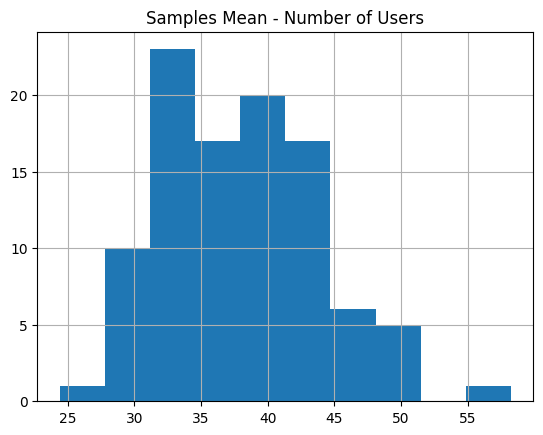

In [9]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)

print('Samples Mean:')
print(sample_means)

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.title('Samples Mean - Number of Users')
# Show plot
plt.show()

**The mean of means**

You want to know what the average number of users (*num_users*) is per deal, but you 
want to know this number for the entire company so that you can see if Amir's deals 
have more or fewer users than the company's average deal. The problem is that over 
the past year, the company has worked on more than ten thousand deals, so it's not 
realistic to compile all the data. Instead, you'll estimate the mean by taking 
several random samples of deals, since this is much easier than collecting data 
from everyone in the company.

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

'''
Output:
38.31333333333332
37.651685393258425
'''

### The Poisson Distribution

[Wikipedia: Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

**Tracking lead responses**

Your company uses sales software to keep track of new sales leads. It organizes 
them into a queue so that anyone can follow up on one when they have a bit of free 
time. Since the number of lead responses is a countable outcome over a period of 
time, this scenario corresponds to a Poisson distribution. On average, Amir responds 
to 4 leads each day. In this exercise, you'll calculate probabilities of Amir 
responding to different numbers of leads.

In [5]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


In [2]:
# Amir's coworker responds to an average of 5.5 leads per day. What is the probability 
# that she answers 5 leads in a day?

# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


In [3]:
# What's the probability that Amir responds to 2 or fewer leads in a day?

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


In [4]:
# What's the probability that Amir responds to more than 10 leads in a day?

# Probability of > 10 responses
prob_over_10 = (1 - poisson.cdf(10,4))

print(prob_over_10)

0.0028397661205137315


### More Probability Distributions

**Exponential distribution**

The first distribution is the exponential distribution, which represents the 
probability of a certain time passing between Poisson events. We can use the 
exponential distribution to predict, for example, the probability of more than 1 
day between adoptions, the probability of fewer than 10 minutes between restaurant 
arrivals, and the probability of 6-8 months passing between earthquakes. Just like 
the Poisson distribution, the time unit doesn't matter as long as it's consistent. 
The exponential distribution uses the same *lambda* value, which represents the rate, 
that the Poisson distribution does. Note that *lambda* and rate mean the same value 
in this context. It's also continuous, unlike the Poisson distribution, since it 
represents time.

For example, let's say that one customer service ticket is created every 2 minutes. 
We can rephrase this so it's in terms of a time interval of one minute, so half 
of a ticket is created each minute. We'll use 0.5 as the *lambda* value. The rate 
(lambda) affects the shape of the distribution and how steeply it declines.

Recall that *lambda* is the expected value of the Poisson distribution, which measures 
frequency in terms of rate or number of events. In our customer service ticket 
example, this means that the expected number of requests per minute is 0.5. 
The exponential distribution measures frequency in terms of time between events. 
The expected value of the exponential distribution can be calculated by taking 1 
divided by *lambda*. 
$$
E\,_{Exponential\,distribution} = \frac{1}{\lambda}
$$
In our example, the expected time between requests is 1 over 
one half, which is 2, so there is an average of 2 minutes between requests.

**t-ditribution (student's)**

The next distribution is the t-distribution, which is also sometimes called Student's 
*t-distribution*. Its shape is similar to the normal distribution, but not quite the 
same. If we compare the *normal* distribution with the *t-distribution* with 
one degree of freedom the *t-distribution's* tails are thicker. This 
means that in a *t-distribution*, observations are more likely to fall further from 
the mean.

Degrees of freedom

The t-distribution has a parameter called degrees of freedom, which affects the 
thickness of the distribution's tails. Lower degrees of freedom results in thicker 
tails and a higher standard deviation. As the number of degrees of freedom increases, 
the distribution looks more and more like the normal distribution.

**Log-normal distribution**

The last distribution we'll discuss is the log-normal distribution. Variables that 
follow a log-normal distribution have a logarithm that is normally distributed. 
This results in distributions that are skewed, unlike the normal distribution. 
There are lots of real-world examples that follow this distribution, such as the 
- length of chess games,
- blood pressure in adults, and
- the number of hospitalizations in the 2003 SARS outbreak.

**Modeling time between leads**

To further evaluate Amir's performance, you want to know how much time it takes 
him to respond to a lead after he opens it. On average, he responds to 1 request 
every 2.5 hours. In this exercise, you'll calculate probabilities of different 
amounts of time passing between Amir receiving a lead and sending a response.

In [ ]:
# Import expon from scipy.stats
from scipy.stats import expon

# What's the probability it takes Amir less than an hour to respond to a lead?
# Print probability response takes < 1 hour
print(expon.cdf(1, scale=(2.5)))# Import expon from scipy.stats
from scipy.stats import expon

# What's the probability it takes Amir less than an hour to respond to a lead?
# Print probability response takes < 1 hour
print(expon.cdf(1, scale=(2.5)))

# What's the probability it takes Amir more than 4 hours to respond to a lead?
# Print probability response takes > 4 hours
print(1 - expon.cdf(4,scale=2.5))

# What's the probability it takes Amir 3-4 hours to respond to a lead?
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3,scale=2.5))

## Correlation and Experimental Design

In this chapter, you'll learn how to quantify the strength of a linear relationship 
between two variables, and explore how confounding variables can affect the relationship 
between two other variables. You'll also see how a study’s design can influence 
its results, change how the data should be analyzed, and potentially affect the 
reliability of your conclusions.

### Correlation

**Correlation coefficient**

We can also examine relationships between two numeric variables using a number 
called the correlation coefficient. This is a number between -1 and 1, where the 
magnitude corresponds to the strength of the relationship between the variables, 
and the sign, positive or negative, corresponds to the direction of the relationship.

The sign of the correlation coefficient corresponds to the direction of the relationship. 
A positive correlation coefficient indicates that as x increases, y also increases. 
A negative correlation coefficient indicates that as x increases, y decreases.

To visualize relationships between two variables, we can use a scatterplot. We'll 
use seaborn, which is a plotting package built on top of matplotlib.

**Computing correlation**

To calculate the correlation coefficient between two Series, we can use the `.corr` 
method. If we want the correlation between the sleep_total and sleep_rem columns 
of msleep, we can take the sleep_total column and call `.corr` on it, passing in 
the other Series we're interested in. Note that it doesn't matter which Series the 
method is invoked on and which is passed in since the correlation between x and y 
is the same thing as the correlation between y and x.

There's more than one way to calculate correlation, but the method we'll be using 
in this video is called the *Pearson product-moment correlation*, which is also 
written as r. This is the most commonly used measure of correlation. Know that there 
are variations of this formula that measure correlation a bit differently, such 
as *Kendall's tau* and *Spearman's rho*, but those are beyond the scope of this course.

**Relationships between variables**

In this chapter, you'll be working with a dataset world_happiness containing results 
from the 2019 World Happiness Report. The report scores various countries based 
on how happy people in that country are. It also ranks each country on various 
societal aspects such as social support, freedom, corruption, and others. The 
dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy 
(`life_exp`) and happiness score (`happiness_score`) both visually and quantitatively. 
Import `seaborn as sns`, `matplotlib.pyplot as plt`, and `pandas as pd` and load 
`world_happiness`.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the course datasets
world_happiness = pd.read_csv("world_happiness.csv")

# Validate dataset
world_happiness.sample(8)

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
10,11,Australia,7.0,17.0,13.0,6.0,45500,82.7,145
8,9,Canada,20.0,9.0,11.0,14.0,44200,82.2,147
90,91,Nepal,87.0,67.0,65.0,46.0,2880,71.5,56
99,100,Somalia,145.0,14.0,16.0,96.0,631,59.2,44
52,53,Jamaica,28.0,49.0,130.0,119.0,8310,74.9,100
87,88,Cameroon,129.0,90.0,120.0,91.0,3400,63.8,60
42,43,Nicaragua,66.0,70.0,43.0,71.0,4620,79.2,111
65,66,Serbia,57.0,124.0,118.0,84.0,16700,76.0,86


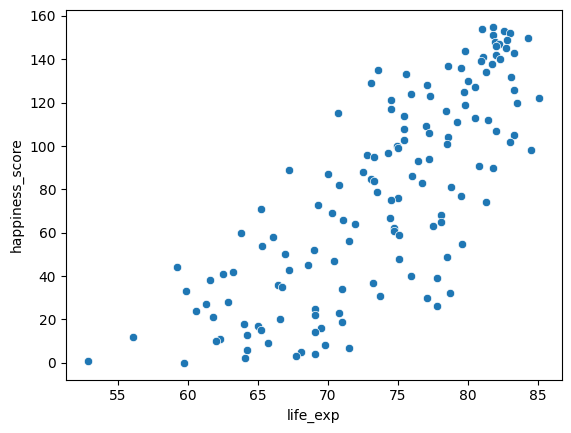

In [7]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp',
                y='happiness_score',
                data=world_happiness
                )

# Show plot
plt.show()

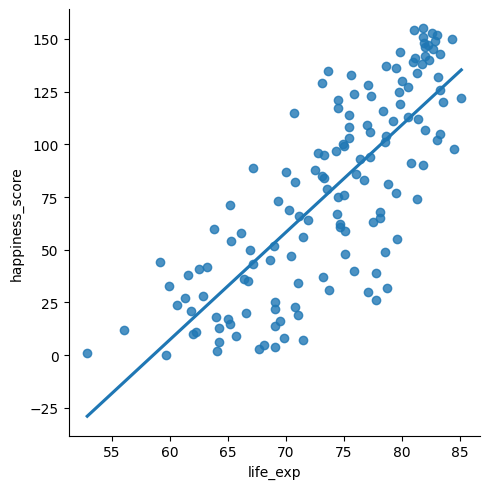

In [11]:
# Create scatterplot of happiness_score vs life_exp with trendline

sns.lmplot(x='life_exp',
           y='happiness_score',
           data=world_happiness,
           ci=None
          )

# Show plot
plt.show()

In [12]:
print(world_happiness.life_exp.corr(world_happiness.happiness_score))

0.7802249053272062


### Correlation caveats

**What can't correlation measure?**

While the correlation coefficient is a convenient way to quantify the strength of 
a relationship between two variables, it's far from perfect. In this exercise, 
you'll explore one of the caveats of the correlation coefficient by examining the 
relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

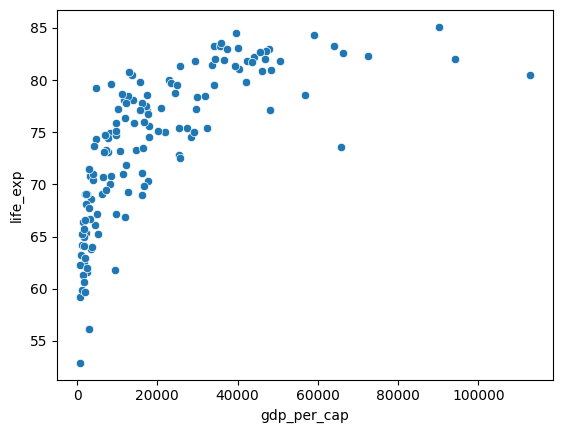

In [13]:
# Create a seaborn scatterplot (without a trendline) showing the relationship between gdp_per_cap (on the x-axis) and life_exp (on the y-axis)
sns.scatterplot(x='gdp_per_cap',
                y='life_exp',
                data=world_happiness
                )
# Show plot
plt.show()

In [14]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness.gdp_per_cap.corr(world_happiness.life_exp)

print(cor)

0.7019547642148015


**Transforming variables**

When variables have skewed distributions, they often require a transformation in 
order to form a linear relationship with another variable so that correlation can 
be computed. In this exercise, you'll perform a transformation yourself.

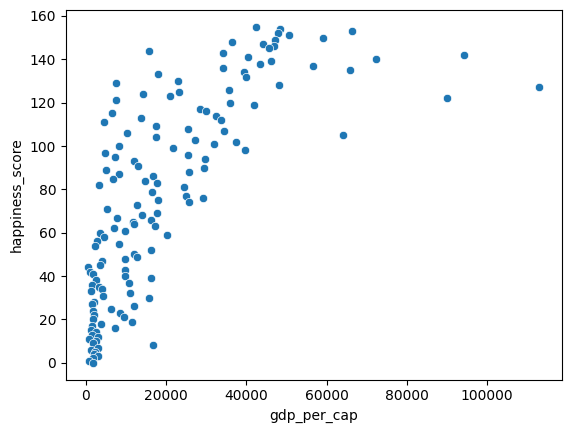

Correlation of GDP vrs Happines is 0.7279733012222975


In [16]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap',
                y='happiness_score',
                data=world_happiness
                )

# Show plot
plt.show()

# Calculate correlation
cor = world_happiness.gdp_per_cap.corr(world_happiness.happiness_score)

print(f'Correlation of GDP vrs Happines is {cor}')

Add a new column to world_happiness called `log_gdp_per_cap` that contains the log 
of `gdp_per_cap`.
Create a seaborn scatterplot of happiness_score versus `log_gdp_per_cap`.
Calculate the correlation between `log_gdp_per_cap` and `happiness_score`.

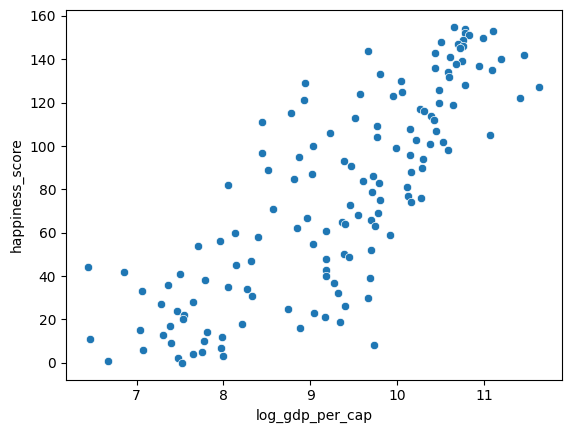

Correlation of GDP vrs Happines is 0.8043146004918288


In [17]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness.gdp_per_cap)

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap',
                y='happiness_score',
                data=world_happiness
                )

# Show plot
plt.show()

# Correlation between log_gdp_per_cap and happiness_score
cor = world_happiness.log_gdp_per_cap.corr(world_happiness.happiness_score)

print(f'Correlation of GDP vrs Happines is {cor}')

**Does sugar improve happiness?**

A new column has been added to world_happiness called grams_sugar_per_day, which 
contains the average amount of sugar eaten per person per day in each country. 
In this exercise, you'll examine the effect of a country's average sugar consumption 
on its happiness score.

In [ ]:
# Create a seaborn scatterplot showing the relationship between grams_sugar_per_day (on the x-axis) and happiness_score (on the y-axis).
sns.scatterplot(x='grams_sugar_per_day',
                y='happiness_score',
                data=world_happiness
                )

# Show plot
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness.grams_sugar_per_day.corr(world_happiness.happiness_score)
print(f'Correlation of GDP vrs Happines is {cor}')

### Design of experiments

Often, data is created as a result of a study that aims to answer a specific question. 
However, data needs to be analyzed and interpreted differently depending on how 
the data was generated and how the study was designed.

1. **Vocabulary**: Experiments generally aim to answer a question in the form, *"What
is the effect of the treatment on the response?"* In this setting, treatment refers
to the explanatory or independent variable, and response refers to the response or
dependent variable. For example, what is the effect of an advertisement on the number
of products purchased? In this case, the treatment is an advertisement, and the
response is the number of products purchased.

2. **Controlled experiments**: In a controlled experiment, participants are randomly
assigned to either the treatment group or the control group, where the treatment
group receives the treatment and the control group does not. A great example of
this is an *A/B test*. In our example, the treatment group will see an advertisement,
and the control group will not. Other than this difference, the groups should be
comparable so that we can determine if seeing an advertisement causes people to
buy more. If the groups aren't comparable, this could lead to confounding, or
bias. If the average age of participants in the treatment group is 25 and the
average age of participants in the control group is 50, age could be a potential
confounder if younger people are more likely to purchase more, and this will make
the experiment biased towards the treatment.

3. The gold standard of experiments will use...
    - The gold standard, or ideal experiment, will eliminate as much bias as possible
      by using certain tools. The first tool to help eliminate bias in controlled
      experiments is to use a randomized controlled trial. In a randomized controlled
      trial, participants are randomly assigned to the treatment or control group
      and their assignment isn't based on anything other than chance. Random assignment
      like this helps ensure that the groups are comparable. The second way is to
      use a placebo, which is something that resembles the treatment, but has no
      effect. This way, participants don't know if they're in the treatment or
      control group. This ensures that the effect of the treatment is due to the
      treatment itself, not the idea of getting the treatment. This is common in
      clinical trials that test the effectiveness of a drug. The control group
      will still be given a pill, but it's a sugar pill that has minimal effects
      on the response.
    - In a double-blind experiment, the person administering the treatment or running
      the experiment also doesn't know whether they're administering the actual
      treatment or the placebo. This protects against bias in the response as well
      as the analysis of the results. These different tools all boil down to the
      same principle: if there are fewer opportunities for bias to creep into your
      experiment, the more reliably you can conclude whether the treatment affects
      the response.

4. **Observational studies**: The other kind of study we'll discuss is the observational
   study. In an observational study, participants are not randomly assigned to groups.
   Instead, participants assign themselves, usually based on pre-existing characteristics.
   This is useful for answering questions that aren't conducive to a controlled experiment.
   If you want to study the effect of smoking on cancer, you can't force people
   to start smoking. Similarly, if you want to study how past purchasing behavior
   affects whether someone will buy a product, you can't force people to have certain
   past purchasing behavior. Because assignment isn't random, there's no way to
   guarantee that the groups will be comparable in every aspect, so observational
   studies can't establish causation, only association. The effects of the treatment
   may be confounded by factors that got certain people into the control group and
   certain people into the treatment group. However, there are ways to control for
   confounders, which can help strengthen the reliability of conclusions about association.

5. **Longitudinal vs. cross-sectional studies**: The final important distinction
   to make is between longitudinal and cross-sectional studies. In a longitudinal
   study, the same participants are followed over a period of time to examine the
   effect of treatment on the response. In a cross-sectional study, data is collected
   from a single snapshot in time. If you wanted to investigate the effect of age
   on height, a cross-sectional study would measure the heights of people of different
   ages and compare them. However, the results will be confounded by birth year
   and lifestyle since it's possible that each generation is getting taller. In
   a longitudinal study,the same people would have their heights recorded at different
   points in their lives, so the confounding is eliminated. It's important to not
   that longitudinal studies are more expensive, and take longer to perform, while
   cross-sectional studies are cheaper, faster, and more convenient.

**Study types**

While controlled experiments are ideal, many situations and research questions are 
not conducive to a controlled experiment. In a controlled experiment, causation 
can likely be inferred if the control and test groups have similar characteristics 
and don't have any systematic difference between them. On the other hand, causation 
cannot usually be inferred from observational studies, whose results are often 
misinterpreted as a result.